# EJERCICIO 1: PREDICCION DE ENFERMEDADES

### A) Crear un modelo que permite predecir con los datos suministrados:
####                I. Enfermedad D1, Imflamacion
####                II. Enfermedad D2, Nefritis

### B) Evaluar el rendimiento de los modelos.

En el archivo "diagnosis.csv" Los datos han sido creados por un experto médico para poner a prueba un modelo que permite predecir dos enfermedades del sistema urinario. 

#### Los datos son:

- id: identificado del registro

- a1: temperatura del paciente

- a2: ocurrencia de nauseas

- a3: dolor lumbar

- a4: necesidad continua de orinar

- a5: dolores miccionales

- a6: ardor de la uretra, picazón o hinchazón de la salida de la uretra

#### Las enfermedades que se desean evaluar son:

- d1: inflamación de la vejiga urinaria

- d2: nefritis de origen en la pelvis renal

###  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . .. . . . . .

# A) CREAR MODELOS
###### I will be following the steps observed in 03_05_Titanic.ipynb

### ~ STEP: IMPORT THE DATA ~ 

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd


diagnosis = pd.read_csv("diagnosis.csv", sep = ";")
diagnosis.columns = ["ID", "a1_Temp","a2_Naus", "a3_Lumb", "a4_Uri", "a5_Mic", 
"a6_Ur", "d1_Infl", "d2_Nefr"]
diagnosis.head()

,ID,a1_Temp,a2_Naus,a3_Lumb,a4_Uri,a5_Mic,a6_Ur,d1_Infl,d2_Nefr
0,1,35.5,0,1,0,0,0,0,0
1,2,35.9,0,0,1,1,1,1,0
2,3,35.9,0,1,0,0,0,0,0
3,4,36.0,0,0,1,1,1,1,0
4,5,36.0,0,1,0,0,0,0,0


## i. CREAR MODELO D1 INFLAMACION

In [3]:
# Separate the TARGET VARIABLE, D1, from the FEATURES COLUMNS
target = "d1_Infl"
features = list(diagnosis.columns)
features.remove("d1_Infl")


# Eliminate the identifiers
features.remove("ID")

In [4]:
# List of available variables to be used in our model:
for var in features:
    print(var , ':' , len(set(diagnosis[var])))

a1_Temp : 44
a2_Naus : 2
a3_Lumb : 2
a4_Uri : 2
a5_Mic : 2
a6_Ur : 2
d2_Nefr : 2


### STEP 1: ANALYZE & TRANSFORM DISCRETE VARIABLES 

In [5]:
# Analyze the DISCRETE VARIABLES
diagnosis[features].head()

# We will analyze which discrete variables are the most predictive
# They are all discrete except for A1, temperature

,a1_Temp,a2_Naus,a3_Lumb,a4_Uri,a5_Mic,a6_Ur,d2_Nefr
0,35.5,0,1,0,0,0,0
1,35.9,0,0,1,1,1,0
2,35.9,0,1,0,0,0,0
3,36.0,0,0,1,1,1,0
4,36.0,0,1,0,0,0,0


In [6]:
# Create a Table of Frequencies
    # ... for each of the discrete variables.
    # determine if they will cause problems.
for var in ["a2_Naus", "a3_Lumb", "a4_Uri", "a5_Mic", 
"a6_Ur", "d2_Nefr"]:
    print("Frequency Table for: Disease D1 + Variable", var)
    print(pd.crosstab(diagnosis[target], diagnosis[var]))
    print()

Frequency Table for: Disease D1 + Variable a2_Naus
a2_Naus   0   1
d1_Infl        
0        51  10
1        40  19

Frequency Table for: Disease D1 + Variable a3_Lumb
a3_Lumb   0   1
d1_Infl        
0        10  51
1        40  19

Frequency Table for: Disease D1 + Variable a4_Uri
a4_Uri    0   1
d1_Infl        
0        40  21
1         0  59

Frequency Table for: Disease D1 + Variable a5_Mic
a5_Mic    0   1
d1_Infl        
0        51  10
1        10  49

Frequency Table for: Disease D1 + Variable a6_Ur
a6_Ur     0   1
d1_Infl        
0        40  21
1        30  29

Frequency Table for: Disease D1 + Variable d2_Nefr
d2_Nefr   0   1
d1_Infl        
0        30  31
1        40  19



#### ~ OBSERVE THE IMPORTANCE OF EACH DISCRETE VARIABLE ~ 

Relationship between Disease D1 and the variable:

- A2: You can have the disease without symptoms of nausea
- A3: You can have the disease without symptoms of back pain
- A4: You cannot have the disease without urination symptoms
- A5: To have the disease, you most likely have micturition pains
- A6: Not a strong determining factor
- D2: Chances of getting D1 are slightly higher than chances of D2. 19/120 have both at the same time.

#### ~ CALCULATE THE IMPORTANCE OF EACH DISCRETE VARIABLE ~

Since the discrete variables in diagnosis.csv are binary, it is easy to calculate the WoE and correlations with Disease D1.

In [7]:
# Calculating Weight of Evidence for Each Variable

def get_WoE(data, var, target):
    crosstab = pd.crosstab(data[target], data[var])
    
    print("\n", "Testing the Weight of Evidence for the Variable", var, ":")
    
    for col in crosstab.columns:
        if crosstab[col][1] == 0:
            print("  Weight of", col, "[", sum(crosstab[col]), "/120 observations] is infinite")
        else:
            print("  Weight of", col, "[", sum(crosstab[col]), "/120 observations] is", np.log(float(crosstab[col][0]) / float(crosstab[col][1])))

for var in ["a2_Naus", "a3_Lumb", "a4_Uri", "a5_Mic", "a6_Ur", "d2_Nefr"]:
    print(get_WoE(diagnosis, var, target))
    print()           

#Strongest weight of evidence: a3_Lumb, a4_Uri, a5_Mic


 Testing the Weight of Evidence for the Variable a2_Naus :
  Weight of 0 [ 91 /120 observations] is 0.2429461786103894
  Weight of 1 [ 29 /120 observations] is -0.6418538861723948
None


 Testing the Weight of Evidence for the Variable a3_Lumb :
  Weight of 0 [ 50 /120 observations] is -1.3862943611198906
  Weight of 1 [ 70 /120 observations] is 0.9873866535578852
None


 Testing the Weight of Evidence for the Variable a4_Uri :
  Weight of 0 [ 40 /120 observations] is infinite
  Weight of 1 [ 80 /120 observations] is -1.0330150061822965
None


 Testing the Weight of Evidence for the Variable a5_Mic :
  Weight of 0 [ 61 /120 observations] is 1.62924053973028
  Weight of 1 [ 59 /120 observations] is -1.589235205116581
None


 Testing the Weight of Evidence for the Variable a6_Ur :
  Weight of 0 [ 70 /120 observations] is 0.28768207245178085
  Weight of 1 [ 50 /120 observations] is -0.322773392263051
None


 Testing the Weight of Evidence for the Variable d2_Nefr :
  Weight of 0 [ 70 /12

In [8]:
# Calculating Correlation for each Variable

print("Values correlated to inflammation, D1: ", "\n",  diagnosis.corr()['d1_Infl'], "\n")
#Strongest correlating factors: a4, a5

print("Values correlated to nefritis, D2: ", "\n",  diagnosis.corr()['d2_Nefr'], "\n")
#Strongest correlating factors: a1, a3

Values correlated to inflammation, D1:  
 ID        -0.243251
a1_Temp   -0.236718
a2_Naus    0.184630
a3_Lumb   -0.521251
a4_Uri     0.695418
a5_Mic     0.666574
a6_Ur      0.149331
d1_Infl    1.000000
d2_Nefr   -0.188777
Name: d1_Infl, dtype: float64 

Values correlated to nefritis, D2:  
 ID         0.713408
a1_Temp    0.737055
a2_Naus    0.667947
a3_Lumb    0.714286
a4_Uri     0.239046
a5_Mic     0.149331
a6_Ur      0.314286
d1_Infl   -0.188777
d2_Nefr    1.000000
Name: d2_Nefr, dtype: float64 



In [9]:
# Listado de variables disponibles para hacer un modelo.
for var in features:
    print(var)

a1_Temp
a2_Naus
a3_Lumb
a4_Uri
a5_Mic
a6_Ur
d2_Nefr


### STEP 2: ANALYZE & TRANSFORM CONTINUOUS VARIABLES 

#### ~ CATEGORIZE THE CONTINUOUS VARIABLE ~

The only remaining variable to calculate is A1, temperature.

#### Patient Temperature WITHOUT Disease:

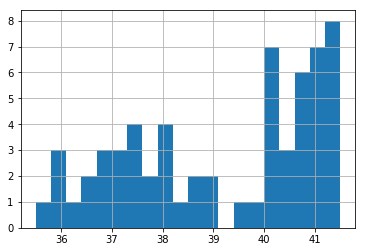

In [10]:
diagnosis['a1_Temp'][diagnosis['d1_Infl']==0].hist(bins=20)

#### Patient Temperature WITH Disease

You can see that there is a higher frequency of temperature below 38 degrees:

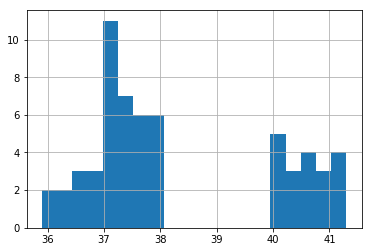

In [11]:
diagnosis['a1_Temp'][diagnosis['d1_Infl']==1].hist(bins=20)

#### ~ DIVIDE TEMPERATURE INTO DISTINCT CATEGORIES, WEIGH THE IMPORTANCE ~



#### Patterns are visible across certain temperature ranges. Use this information to categorize the variables.
- lambda x: 'n0' 
- if x < 37 else 'n1' 
- if x < 38.2 else 'n2' 
- if x < 39.8 else 'n3'
- if x < 42 else 'n4'


In [12]:
diagnosis.loc[:, 'a1_Temp_grp'] = diagnosis['a1_Temp'].map(lambda x: 'n0' if x < 37 else 'n1' if x < 38.2 else 'n2' if x < 39.8 else 'n3' if x < 42 else 'n4')
get_WoE(diagnosis, 'a1_Temp_grp', target) 


 Testing the Weight of Evidence for the Variable a1_Temp_grp :
  Weight of n0 [ 20 /120 observations] is 0.0
  Weight of n1 [ 43 /120 observations] is -0.8362480242006186
  Weight of n2 [ 7 /120 observations] is infinite
  Weight of n3 [ 50 /120 observations] is 0.4895482253187058


In [13]:
# Now that the transformation has been done, eliminate the previous variable and add the new group to the list.
features.remove('a1_Temp')
features.append("a1_Temp_grp")

In [14]:
# Listado de variables disponibles para hacer un modelo.
for var in features:
    print(var)

a2_Naus
a3_Lumb
a4_Uri
a5_Mic
a6_Ur
d2_Nefr
a1_Temp_grp


### STEP 3: CREATE THE ACTUAL MODEL

We have transformed the variables already. 

Next, we need to: 

- Create the dummy variables, 
- eliminate the collinear variables and 
- separate data into training and test sets.

#### ~ CREATE THE DUMMY VARIABLES ~

In [15]:
# CREATE THE DUMMY VARIABLES
data_model = pd.concat((pd.get_dummies(diagnosis['a1_Temp_grp'], prefix = 'a1'),
                        pd.get_dummies(diagnosis['a2_Naus'], prefix = 'a2'),
                        pd.get_dummies(diagnosis['a3_Lumb'], prefix = 'a3'),
                        pd.get_dummies(diagnosis['a4_Uri'], prefix = 'a4'),
                        pd.get_dummies(diagnosis['a5_Mic'], prefix = 'a5'),
                        pd.get_dummies(diagnosis['a6_Ur'], prefix = 'a6'),
                        pd.get_dummies(diagnosis['d2_Nefr'], prefix = 'd2')), axis = 1)


#### ~ ELIMINATE THE COLLINEAR VARIABLES ~

In [16]:
# ELIMINATE COLLINEAR VARIABLES

from sklearn.linear_model import LinearRegression
def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)
        
        x = data[x_features]
        y = data[y_featue]
        
        model.fit(data[x_features], data[y_featue])
        
        result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
    
    return result

def selectDataUsingVIF(data, max_VIF = 5):
    result = data.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.as_matrix().max() > max_VIF:
        col_max = np.where(VIF == VIF.as_matrix().max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result

In [17]:
# Too many infinites!!! Not all colinear variables have been eliminated.
# We will pass them through the function selectDataUsingVIF in the next stage.
calculateVIF(data_model)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


,a1_n0,a1_n1,a1_n2,a1_n3,a2_0,a2_1,a3_0,a3_1,a4_0,a4_1,a5_0,a5_1,a6_0,a6_1,d2_0,d2_1
VIF,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [18]:
# None of the variables are over 5, or infinite. 
# (VIF measures when the variance of a regressive coefficient has increased to due to colineality.)
# Collinear variables are therefore eliminated.

model_vars = selectDataUsingVIF(data_model)
calculateVIF(model_vars)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


,a1_n1,a1_n2,a1_n3,a3_1,a4_1,a5_1,a6_1
VIF,2.398578,1.59016,2.279761,1.4493,2.184235,1.338548,1.886937


#### ~ SEPARATE THE DATA INTO TRAINING AND TEST SETS ~

In [19]:
# Import the train_test_split model
from sklearn.cross_validation import train_test_split

# Separate the variables into training and test sets
x_train, x_test, y_train, y_test = train_test_split(model_vars, diagnosis['d1_Infl'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
# Import the accuracy_score, auc, confusion_matrix, f1_score, etc.
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

# Start validating the model
def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

    # Apply the confusion matrix function
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print('\n', "CONFUSION MATRIX:")
    print(confusion_matrix)

    print('\n','ACCURACY SCORE:', "\n", accuracy_score(y_true, y_pred))
    print('\n','PRECISION SCORE:', "\n", precision_score(y_true, y_pred))
    print('\n','RECALL SCORE:', "\n", recall_score(y_true, y_pred))
    print('\n','F1 SCORE:', "\n", f1_score(y_true, y_pred))

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print('\n', "AUC GRAPH:", "\n", auc(false_positive_rate, recall))

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title('AUC = %0.2f' % roc_auc)

In [21]:
# Import Logistic Regression
from sklearn.linear_model.logistic import LogisticRegression

# Instantiate the regressor
model = LogisticRegression().fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#### TRAINING DATA SET


 CONFUSION MATRIX:
[[42  0]
 [ 0 48]]

 ACCURACY SCORE: 
 1.0

 PRECISION SCORE: 
 1.0

 RECALL SCORE: 
 1.0

 F1 SCORE: 
 1.0

 AUC GRAPH: 
 1.0


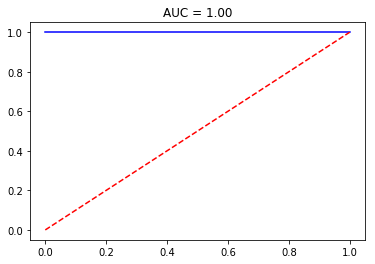

In [22]:
# Training Set
metricas_modelos(y_train, y_pred_train)

#### TESTING DATA SET


 CONFUSION MATRIX:
[[19  0]
 [ 0 11]]

 ACCURACY SCORE: 
 1.0

 PRECISION SCORE: 
 1.0

 RECALL SCORE: 
 1.0

 F1 SCORE: 
 1.0

 AUC GRAPH: 
 1.0


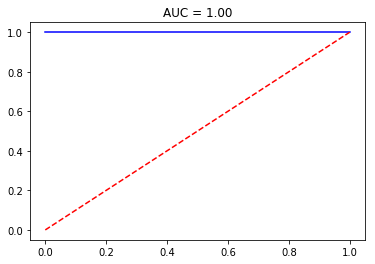

In [23]:
# Testing Set
metricas_modelos(y_test, y_pred_test)

### B) Evaluar el rendimiento de los modelos.

#### MAKE A PREDICTION

In [24]:
# 1 MEANS = PATIENT TESTS POSITIVE FOR THE DISEASE D1
# 0 MEANS = PATIENT TESTS NEGATIVE FOR DISEASE D1
def diseased_or_not(prediction):
    if final_diagnosis == [1]:
        print("I have some terrible news for you... You have a urinary bladder infection. Sucks to be you!")
    else: 
        print("Congrats! You're fine. Now go party!")

In [25]:
#  observe the training data set:
x_train.head()

,a1_n1,a1_n2,a1_n3,a3_1,a4_1,a5_1,a6_1
86,0,0,1,0,0,0,0
119,0,0,1,1,1,0,1
17,0,0,0,0,1,1,1
105,0,0,1,1,1,1,1
36,1,0,0,0,1,0,0


In [26]:
# Fill in values for the predictive data set:
# put 1 for symptoms: a1_n3 (fever 38+), a3, a4, a5, a6
new_prediction =  [0,0,1,1,1,1,1]

In [27]:
# Check what our model predicts!
final_diagnosis = model.predict([new_prediction])
diseased_or_not(final_diagnosis)

I have some terrible news for you... You have a urinary bladder infection. Sucks to be you!


## ii. CREAR MODELO D2 NEFRITIS

In [28]:
# Separate the TARGET VARIABLE, D1, from the FEATURES COLUMNS
target = "d2_Nefr"
features = list(diagnosis.columns)
features.remove("d2_Nefr")


# Eliminate the identifiers
features.remove("ID")

In [29]:
# List of available variables to be used in our model:
for var in features:
    print(var , ':' , len(set(diagnosis[var])))

a1_Temp : 44
a2_Naus : 2
a3_Lumb : 2
a4_Uri : 2
a5_Mic : 2
a6_Ur : 2
d1_Infl : 2
a1_Temp_grp : 4


### STEP 1: ANALYZE & TRANSFORM DISCRETE VARIABLES 

In [30]:
# Analyze the DISCRETE VARIABLES
diagnosis[features].head()

# We will analyze which discrete variables are the most predictive
# They are all discrete except for A1, temperature

,a1_Temp,a2_Naus,a3_Lumb,a4_Uri,a5_Mic,a6_Ur,d1_Infl,a1_Temp_grp
0,35.5,0,1,0,0,0,0,n0
1,35.9,0,0,1,1,1,1,n0
2,35.9,0,1,0,0,0,0,n0
3,36.0,0,0,1,1,1,1,n0
4,36.0,0,1,0,0,0,0,n0


In [31]:
# Create a Table of Frequencies
    # ... for each of the discrete variables.
    # determine if they will cause problems.
for var in ["a2_Naus", "a3_Lumb", "a4_Uri", "a5_Mic", 
"a6_Ur", "d1_Infl"]:
    print("Frequency Table for: Disease D2 + Variable", var)
    print(pd.crosstab(diagnosis[target], diagnosis[var]))
    print()

Frequency Table for: Disease D2 + Variable a2_Naus
a2_Naus   0   1
d2_Nefr        
0        70   0
1        21  29

Frequency Table for: Disease D2 + Variable a3_Lumb
a3_Lumb   0   1
d2_Nefr        
0        50  20
1         0  50

Frequency Table for: Disease D2 + Variable a4_Uri
a4_Uri    0   1
d2_Nefr        
0        30  40
1        10  40

Frequency Table for: Disease D2 + Variable a5_Mic
a5_Mic    0   1
d2_Nefr        
0        40  30
1        21  29

Frequency Table for: Disease D2 + Variable a6_Ur
a6_Ur     0   1
d2_Nefr        
0        50  20
1        20  30

Frequency Table for: Disease D2 + Variable d1_Infl
d1_Infl   0   1
d2_Nefr        
0        30  40
1        31  19



#### ~ OBSERVE THE IMPORTANCE OF EACH DISCRETE VARIABLE ~ 

Relationship between Disease D2 and the variable:

- A2: If you don't have nausea, you don't have the disease
- A3: If you have lumbar pain, you don't have the disease
- A4: Urination symptoms are not a definite indicator
- A5: Micturition pains are not a definite indicator
- A6: Not a strong determining factor
- D1: 1/3 of D1 patients also have D2. 

#### ~ CALCULATE THE IMPORTANCE OF EACH DISCRETE VARIABLE ~

Since the discrete variables in diagnosis.csv are binary, it is easy to calculate the WoE and correlations with Disease D2.

In [32]:
def get_WoE(data, var, target):
    crosstab = pd.crosstab(data[target], data[var])
    
    print("\n", "Testing the Weight of Evidence for the Variable", var, ":")
    
    for col in crosstab.columns:
        if crosstab[col][1] == 0:
            print("  Weight of", col, "[", sum(crosstab[col]), "/120 observations] is infinite")
        else:
            print("  Weight of", col, "[", sum(crosstab[col]), "/120 observations] is", np.log(float(crosstab[col][0]) / float(crosstab[col][1])))

for var in ["a2_Naus", "a3_Lumb", "a4_Uri", "a5_Mic", "a6_Ur", "d1_Infl"]:
    print(get_WoE(diagnosis, var, target))
    print()           

#Strongest weight of evidence: a3_Lumb, a6_Ur


 Testing the Weight of Evidence for the Variable a2_Naus :
  Weight of 0 [ 91 /120 observations] is 1.2039728043259361
  Weight of 1 [ 29 /120 observations] is -inf
None


 Testing the Weight of Evidence for the Variable a3_Lumb :
  Weight of 0 [ 50 /120 observations] is infinite
  Weight of 1 [ 70 /120 observations] is -0.916290731874155
None


 Testing the Weight of Evidence for the Variable a4_Uri :
  Weight of 0 [ 40 /120 observations] is 1.0986122886681098
  Weight of 1 [ 80 /120 observations] is 0.0
None


 Testing the Weight of Evidence for the Variable a5_Mic :
  Weight of 0 [ 61 /120 observations] is 0.6443570163905132
  Weight of 1 [ 59 /120 observations] is 0.033901551675681416
None


 Testing the Weight of Evidence for the Variable a6_Ur :
  Weight of 0 [ 70 /120 observations] is 0.9162907318741551
  Weight of 1 [ 50 /120 observations] is -0.40546510810816444
None


 Testing the Weight of Evidence for the Variable d1_Infl :
  Weight of 0 [ 61 /120 observations] is -0.03278

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


### STEP 2: ANALYZE & TRANSFORM CONTINUOUS VARIABLES 


#### ~ CATEGORIZE THE CONTINUOUS VARIABLE ~

The only remaining variable to calculate is A1, temperature.

#### Patient Temperature WITHOUT Disease:

You can see most patients without the disease have a temperature below 38 degrees. None are between 38 and 40.

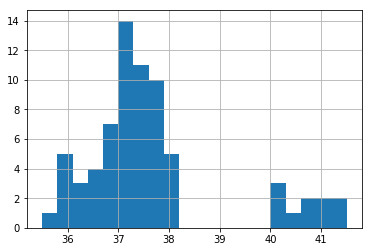

In [33]:
diagnosis['a1_Temp'][diagnosis['d2_Nefr']==0].hist(bins=20)

#### Patient Temperature WITH Disease

You can see that there is a higher frequency of temperature above 40 degrees:

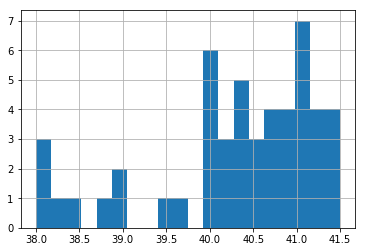

In [34]:
diagnosis['a1_Temp'][diagnosis['d2_Nefr']==1].hist(bins=20)

#### ~ DIVIDE TEMPERATURE INTO DISTINCT CATEGORIES, WEIGH THE IMPORTANCE ~



#### Patterns are visible across certain temperature ranges. Use this information to categorize the variables.

- lambda x: 'n0' 
- if x < 38 else 'n1' 
- if x < 40 else 'n2'

In [35]:
diagnosis.loc[:, 'a1_Temp_grp2'] = diagnosis['a1_Temp'].map(lambda x: 'n0' if x < 38 else 'n1' if x < 40 else 'n2')

In [36]:
diagnosis.loc[:, 'a1_Temp_grp2'] = diagnosis['a1_Temp'].map(lambda x: 'n0' if x < 37 else 'n1' if x < 38.2 else 'n2' if x < 39.8 else 'n3' if x < 42 else 'n4')
get_WoE(diagnosis, 'a1_Temp_grp2', target) 


 Testing the Weight of Evidence for the Variable a1_Temp_grp2 :
  Weight of n0 [ 20 /120 observations] is infinite
  Weight of n1 [ 43 /120 observations] is 2.5902671654458267
  Weight of n2 [ 7 /120 observations] is -inf
  Weight of n3 [ 50 /120 observations] is -1.3862943611198906


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [37]:
#Eliminate A1 and replace it with the A1 group that we just created
features.remove('a1_Temp')
features.remove('a1_Temp_grp')
features.append('a1_Temp_grp2')

In [38]:
#List of variables available to make the model:
for var in features:
    print(var)

a2_Naus
a3_Lumb
a4_Uri
a5_Mic
a6_Ur
d1_Infl
a1_Temp_grp2


### STEP 3: CREATE THE ACTUAL MODEL

We have transformed the variables already. 

Next, we need to: 

- Create the dummy variables, 
- eliminate the collinear variables and 
- separate data into training and test sets.

#### ~ CREATE THE DUMMY VARIABLES ~

In [39]:
# CREATE THE DUMMY VARIABLES
data_model = pd.concat((pd.get_dummies(diagnosis['a1_Temp_grp2'], prefix = 'a1'),
                        pd.get_dummies(diagnosis['a2_Naus'], prefix = 'a2'),
                        pd.get_dummies(diagnosis['a3_Lumb'], prefix = 'a3'),
                        pd.get_dummies(diagnosis['a4_Uri'], prefix = 'a4'),
                        pd.get_dummies(diagnosis['a5_Mic'], prefix = 'a5'),
                        pd.get_dummies(diagnosis['a6_Ur'], prefix = 'a6'),
                        pd.get_dummies(diagnosis['d1_Infl'], prefix = 'd1')), axis = 1)


In [40]:
# Too many infinites!!! Not all colinear variables have been eliminated.
# We will pass them through the function selectDataUsingVIF in the next stage.
calculateVIF(data_model)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


,a1_n0,a1_n1,a1_n2,a1_n3,a2_0,a2_1,a3_0,a3_1,a4_0,a4_1,a5_0,a5_1,a6_0,a6_1,d1_0,d1_1
VIF,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [41]:
# None of the variables are over 5, or infinite. 
# (VIF measures when the variance of a regressive coefficient has increased to due to colineality.)
# Collinear variables are therefore eliminated.

model_vars = selectDataUsingVIF(data_model)
calculateVIF(model_vars)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


,a1_n1,a1_n2,a1_n3,a3_1,a4_1,a5_1,a6_1
VIF,2.398578,1.59016,2.279761,1.4493,2.184235,1.338548,1.886937


#### ~ SEPARATE THE DATA INTO TRAINING AND TEST SETS ~

In [42]:

# Separate the variables into training and test sets
x_train, x_test, y_train, y_test = train_test_split(model_vars, diagnosis['d2_Nefr'])

In [43]:
#IMPORT
#from sklearn.linear_model.logistic import LogisticRegression

# Instantiate the regressor
model = LogisticRegression().fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#### TRAINING DATA SET


 CONFUSION MATRIX:
[[57  0]
 [ 0 33]]

 ACCURACY SCORE: 
 1.0

 PRECISION SCORE: 
 1.0

 RECALL SCORE: 
 1.0

 F1 SCORE: 
 1.0

 AUC GRAPH: 
 1.0


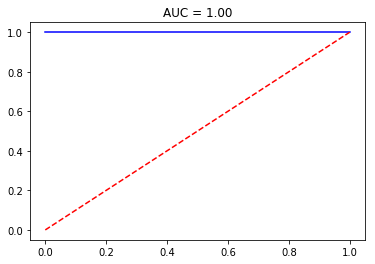

In [44]:
# Training Set
metricas_modelos(y_train, y_pred_train)

#### TESTING DATA SET


 CONFUSION MATRIX:
[[13  0]
 [ 3 14]]

 ACCURACY SCORE: 
 0.9

 PRECISION SCORE: 
 1.0

 RECALL SCORE: 
 0.8235294117647058

 F1 SCORE: 
 0.9032258064516129

 AUC GRAPH: 
 0.9117647058823529


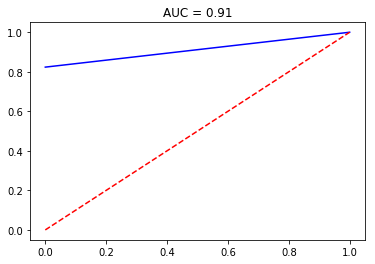

In [45]:
#Testing Set
metricas_modelos(y_test, y_pred_test)

### B) Evaluar el rendimiento de los modelos.

#### MAKE A PREDICTION

In [46]:
# 1 MEANS = PATIENT TESTS POSITIVE FOR THE DISEASE D1
# 0 MEANS = PATIENT TESTS NEGATIVE FOR DISEASE D1
def diseased_or_not(prediction):
    if final_diagnosis == [1]:
        print("I have some terrible news for you... You have nephritis. Sorry!")
    else: 
        print("Congrats! You're fine. Go party!")

In [47]:
# observe the training data set:
x_train.head()

,a1_n1,a1_n2,a1_n3,a3_1,a4_1,a5_1,a6_1
33,1,0,0,0,1,0,0
68,0,1,0,1,1,0,1
14,0,0,0,1,0,0,0
21,1,0,0,0,1,1,0
46,1,0,0,0,1,1,0


In [48]:
# Fill in values for the predictive data set:
# put 1 for symptoms: a1_n2 (fever 40+), a3, a4, a5, a6
new_prediction = [0,1,0,1,1,1,1]

In [49]:
# Check what our model predicts!
final_diagnosis = model.predict([new_prediction])
diseased_or_not(final_diagnosis)

I have some terrible news for you... You have nephritis. Sorry!


# EXERCISE 2

### En el archivo “concrete.csv” se encuentra los datos de diferentes mezclas de hormigón. 


### Utilizar el análisis de componentes principales y obtener el número de componentes principales con los que se puede explicar el 

#### a) 50% de la varianza
#### b) 75% de la varianza
#### c) 90% de la varianza. 

#### d) Obtener el porcentaje de la varianza que explica la primera componente principal

In [77]:
# Import the data
concrete = pd.read_csv('concrete.csv')
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [78]:
# Import the PCA model using sk.learn
from sklearn.decomposition import PCA

# Calculate the PCA
    # PCA locates the main axes of the data. 
    # It explains how important they are in the distribution of the data.
pca = PCA(n_components = None)
concrete_pca = pca.fit_transform(concrete)

### See below

#### a) 50% de la varianza --> n=2 (explains 57%)
#### b) 75% de la varianza --> n=3 (explains 75%)
#### c) 90% de la varianza. --> n=5 (explains 96%

In [72]:
# Now display the concrete variance for components 1 to 9
    # This helps us select the components that best explain the variability    
for i in range(shape(concrete_pca)[1]):
    print("Variance explained for", i + 1, "components:", pca.explained_variance_ratio_[range(i + 1)].sum())

Variance explained for 1 components: 0.3249129815446272
Variance explained for 2 components: 0.5724331282512514
Variance explained for 3 components: 0.7560051466630762
Variance explained for 4 components: 0.8630074198158685
Variance explained for 5 components: 0.9634424828254187
Variance explained for 6 components: 0.9953882736798664
Variance explained for 7 components: 0.997959553582989
Variance explained for 8 components: 0.9997163809073328
Variance explained for 9 components: 0.9999999999999999


### d) Obtener el porcentaje de la varianza que explica la primera componente principal

#### If we select 9 PCAs, the first PCA explains 32 % of the variance:


In [76]:
# How important is the component number?
# Explained variance quantifies the importance of the direction
pca = PCA(n_components=9).fit(concrete)

for i in range(len(pca.explained_variance_)):
    print('The component "', i + 1, '" explains', int(pca.explained_variance_ratio_[i] / sum(pca.explained_variance_ratio_)*100), 'percent of the variance.', "\n" 'That variance is:', "\n", pca.components_[i], "\n")

The component " 1 " explains 32 percent of the variance. 
That variance is: 
 [ 0.90443974 -0.25467084 -0.23937562  0.00542035 -0.00112053 -0.01281057
 -0.21226345  0.10031213  0.06721449] 

The component " 2 " explains 24 percent of the variance. 
That variance is: 
 [ 0.02306241  0.78881234 -0.29906341  0.07548306 -0.00487303 -0.27609068
 -0.44648591  0.07000456  0.04008098] 

The component " 3 " explains 18 percent of the variance. 
That variance is: 
 [ 0.15204486  0.07144972 -0.04889159 -0.04206219  0.02418344 -0.75985985
  0.61268308 -0.11771877  0.02018896] 

The component " 4 " explains 10 percent of the variance. 
That variance is: 
 [-0.01348223 -0.20068135  0.68623788  0.07578572  0.02037147 -0.47859717
 -0.48052483  0.14663614  0.03166714] 

The component " 5 " explains 10 percent of the variance. 
That variance is: 
 [-0.1537579  -0.10133729 -0.18780743  0.09396764 -0.02279073 -0.0620411
  0.1456254   0.94572822  0.0448394 ] 

The component " 6 " explains 3 percent of the 

#### If we select 3 PCAs, total of 75 variance, the first component from those 75% explains 42%

In [91]:
pca = PCA(n_components=3).fit(concrete)

for i in range(len(pca.explained_variance_)):
    print('The component "', i + 1, '" explains', int(pca.explained_variance_ratio_[i] / sum(pca.explained_variance_ratio_)*100), 'percent of the variance.', "\n" 'That variance is:', "\n", pca.components_[i], "\n")
    

The component " 1 " explains 42 percent of the variance. 
That variance is: 
 [ 0.90443974 -0.25467084 -0.23937562  0.00542035 -0.00112053 -0.01281057
 -0.21226345  0.10031213  0.06721449] 

The component " 2 " explains 32 percent of the variance. 
That variance is: 
 [ 0.02306241  0.78881234 -0.29906341  0.07548306 -0.00487303 -0.27609068
 -0.44648591  0.07000456  0.04008098] 

The component " 3 " explains 24 percent of the variance. 
That variance is: 
 [ 0.15204486  0.07144972 -0.04889159 -0.04206219  0.02418344 -0.75985985
  0.61268308 -0.11771877  0.02018896] 



# EXERCISE 3

## Regresión de una función con Theano (Nivel Intermedio)


### a) Create a dataset using the following code:
trX = np.linspace(-1, 1, 101)
trY = np.linspace(-1, 1, 101)

for i in range(len(trY)):
    trY[i] = math.sin(0.2 * trX[i]) + math.exp(-0.7 * trX[i]) + np.random.randn() * 0.033

### b) NOW use Theano to obtain the parameters w_0 & w_1 for the corresponding model
  y = sin(w_0 * x) + exp(w_1 * x)

### THEANO INSTALLATION

En las sesiones se aprendizaje profundo se utilizará la librería Theano (http://deeplearning.net/software/theano/index.html), la cual no se incluye en la distribución estándar de Anaconda.

Theano es un paquete de software que le permite escribir código simbólico y compilarlo. Fue desarrollado por investigadores de aprendizaje automático en la Universidad de Montreal. Su uso no se limita a las aplicaciones de aprendizaje automático, pero fue diseñado con el aprendizaje automático en mente.

Para la instalación de Theano en Anaconda se han de ejecutar los siguientes comandos en la terminal:

    pip install Theano

    conda install pydot

A partir de este punto debería poderse importar Theano en un IPython Notebook utilizando el siguiente comando:

    import theano
    
___________________________________________________________
___________________________________________________________
___________________________________________________________

### a) Create a dataset 

In [ ]:
#imports
import theano
import theano.tensor as T
import math

In [94]:
#Implement the function regression
trX = np.linspace(-1, 1, 101)
trY = np.linspace(-1, 1, 101)

for i in range(len(trY)):
    trY[i] = math.sin(0.2 * trX[i]) + math.exp(-0.7 * trX[i]) + np.random.randn() * 0.033


X = T.scalar()
Y = T.scalar()

def model(x_1,w_0,w_1):
    return (T.sin(w_0 * x_1) + T.exp(w_1 * x_1))

### b) Use Theano to obtain the parameters w_0 & w_1

In [ ]:
w_0 = theano.shared(np.asarray(0., dtype = theano.config.floatX))
w_1 = theano.shared(np.asarray(0., dtype = theano.config.floatX))
y = model(X, w_0, w_1)



cost     = T.mean(T.sqr(y - Y))
gradient_w_0 = T.grad(cost = cost, wrt = w_0)
gradient_w_1 = T.grad(cost = cost, wrt = w_1)
updates  = [[w_0, w_0 - gradient_w_0 * 0.01], [w_1, w_1 - gradient_w_1 * 0.01]]

train = theano.function(inputs = [X, Y],
                        outputs = cost,
                        updates = updates,
                        allow_input_downcast = True)

for i in range(15):
    for x, y in zip(trX, trY):
        cost_i = train(x, y)
    print('In step', i, 'the value for w_0 is: ', w_0.get_value(), "\n", 'and for w_1 is: ', w_1.get_value(), "\n", 'the cost will be: ', cost_i, "\n") 
    